## The Spark Foundation - Data Science Internship Task-4

##### Name - Jay Prakash Bind
##### Email - jaypr202@gmail.com
##### mob no. - +918887624847

#### Task : Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 

# Sentiment Analysis of news headlines

#### Importing library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df=pd.read_excel('historical data.xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,1995.829956,4666470000
1,2015-10-08,1994.010010,2016.500000,1987.530029,2013.430054,2013.430054,3939140000
2,2015-10-09,2013.729980,2020.130005,2007.609985,2014.890015,2014.890015,3706900000
3,2015-10-12,2015.650024,2018.660034,2010.550049,2017.459961,2017.459961,2893250000
4,2015-10-13,2015.000000,2022.339966,2001.780029,2003.689941,2003.689941,3401920000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
print(f'Dataframe contain stock price between {df.Date.min()} {df.Date.max()}')
print(f'Total_days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe contain stock price between 2015-10-07 00:00:00 2020-10-06 00:00:00
Total_days = 1826 days


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2612.647124,2625.483320,2598.263002,2612.922889,2612.922889,3.846053e+09
std,395.590424,397.818611,392.990571,395.385725,395.385725,9.820968e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09
25%,2268.475098,2272.690064,2261.215088,2268.889893,2268.889893,3.290665e+09
50%,2658.229980,2676.479980,2644.100098,2659.409912,2659.409912,3.627610e+09
75%,2896.530029,2905.545044,2879.410034,2888.859986,2888.859986,4.099800e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,9.044690e+09


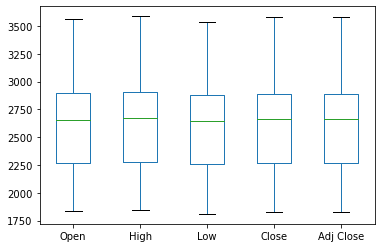

In [7]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [8]:
# setting layout for our plot
layout=go.Layout(
    title='stock price',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#ba0d0d'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#ba0d0d'
        )
    )
)

df_data=[{'x':df['Date'], 'y':df['Close']}]
plot=go.Figure(data=df_data, layout=layout)

In [9]:
# plotting
iplot(plot)

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.isna().any

<bound method DataFrame.any of        Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
1254  False  False  False  False  False      False   False
1255  False  False  False  False  False      False   False
1256  False  False  False  False  False      False   False
1257  False  False  False  False  False      False   False
1258  False  False  False  False  False      False   False

[1259 rows x 7 columns]>

In [12]:
df=df[:1239]

In [13]:
print(len(df))

1239


In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,1995.829956,4666470000
1,2015-10-08,1994.010010,2016.500000,1987.530029,2013.430054,2013.430054,3939140000
2,2015-10-09,2013.729980,2020.130005,2007.609985,2014.890015,2014.890015,3706900000
3,2015-10-12,2015.650024,2018.660034,2010.550049,2017.459961,2017.459961,2893250000
4,2015-10-13,2015.000000,2022.339966,2001.780029,2003.689941,2003.689941,3401920000


In [15]:
len(df)

1239

## Sentiment analysis

In [16]:
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
# reading data
df2=pd.read_csv("india-news-headlines.csv", parse_dates=True)
df2

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
1048570,20110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...
1048571,20110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...
1048572,20110207,city.patna,Central team to visit Kutku dam in Bihar
1048573,20110207,city.bhubaneswar,Red bandh evokes lukewarm response


In [18]:
df2['publish_date']= pd.to_datetime(df2['publish_date'])
df2

,publish_date,headline_category,headline_text
0,1970-01-01 00:00:00.020010101,sports.wwe,win over cena satisfying but defeating underta...
1,1970-01-01 00:00:00.020010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,1970-01-01 00:00:00.020010102,unknown,Fissures in Hurriyat over Pak visit
3,1970-01-01 00:00:00.020010102,unknown,America's unwanted heading for India?
4,1970-01-01 00:00:00.020010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
1048570,1970-01-01 00:00:00.020110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...
1048571,1970-01-01 00:00:00.020110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...
1048572,1970-01-01 00:00:00.020110207,city.patna,Central team to visit Kutku dam in Bihar
1048573,1970-01-01 00:00:00.020110207,city.bhubaneswar,Red bandh evokes lukewarm response


In [19]:
print(len(df2))

1048575


In [20]:
df2=df2[499960:]

In [21]:
df2

,publish_date,headline_category,headline_text
499960,1970-01-01 00:00:00.020070918,city.thiruvananthapuram,CPM may use phone jammers
499961,1970-01-01 00:00:00.020070918,city.pune,Traffic diversions from Sept 19 to 25
499962,1970-01-01 00:00:00.020070918,city.pune,UoP fails to find suitable registrar
499963,1970-01-01 00:00:00.020070918,india,PM to be discharged from AIIMS today
499964,1970-01-01 00:00:00.020070918,india,Timing of Buddhadeb's remarks significant
...,...,...,...
1048570,1970-01-01 00:00:00.020110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...
1048571,1970-01-01 00:00:00.020110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...
1048572,1970-01-01 00:00:00.020110207,city.patna,Central team to visit Kutku dam in Bihar
1048573,1970-01-01 00:00:00.020110207,city.bhubaneswar,Red bandh evokes lukewarm response


In [31]:
df2.rename(columns={'publish_date': 'Date'}, inplace=True)
df2

,Date,headline_text
0,1970-01-01 00:00:00.020070918,"CPM may use phone jammers,Traffic diversions f..."
1,1970-01-01 00:00:00.020070919,"Dressed to thrill? Not reely,I am a very posit..."
2,1970-01-01 00:00:00.020070920,"Hey juniors! Are you ready to rock?,Saawariya'..."
3,1970-01-01 00:00:00.020070921,"Yoga for face,Priyanka Chopra tears abs muscle..."
4,1970-01-01 00:00:00.020070922,"Today TV lacks creativity: Sandhya,Vivan Bhate..."
...,...,...
1234,1970-01-01 00:00:00.020110203,"All's not well with Deepika; Akshay,Arshad ups..."
1235,1970-01-01 00:00:00.020110204,"Abhishek Bachchan,Wish the star a very happy b..."
1236,1970-01-01 00:00:00.020110205,"Abhishek Bachchan,Labourers clash,List of LGT ..."
1237,1970-01-01 00:00:00.020110206,"Akki; Urmila meet after 14 years,No melody in ..."


In [23]:
df2=df2.groupby(['Date'], as_index = False).agg({'headline_text': ','.join})
print(df2)

                              Date  \
0    1970-01-01 00:00:00.020070918   
1    1970-01-01 00:00:00.020070919   
2    1970-01-01 00:00:00.020070920   
3    1970-01-01 00:00:00.020070921   
4    1970-01-01 00:00:00.020070922   
...                            ...   
1234 1970-01-01 00:00:00.020110203   
1235 1970-01-01 00:00:00.020110204   
1236 1970-01-01 00:00:00.020110205   
1237 1970-01-01 00:00:00.020110206   
1238 1970-01-01 00:00:00.020110207   

                                          headline_text  
0     CPM may use phone jammers,Traffic diversions f...  
1     Dressed to thrill? Not reely,I am a very posit...  
2     Hey juniors! Are you ready to rock?,Saawariya'...  
3     Yoga for face,Priyanka Chopra tears abs muscle...  
4     Today TV lacks creativity: Sandhya,Vivan Bhate...  
...                                                 ...  
1234  All's not well with Deepika; Akshay,Arshad ups...  
1235  Abhishek Bachchan,Wish the star a very happy b...  
1236  Abhishek Bachch

In [38]:
df2.tail()

,Date,headline_text
1234,1970-01-01 00:00:00.020110203,"All's not well with Deepika; Akshay,Arshad ups..."
1235,1970-01-01 00:00:00.020110204,"Abhishek Bachchan,Wish the star a very happy b..."
1236,1970-01-01 00:00:00.020110205,"Abhishek Bachchan,Labourers clash,List of LGT ..."
1237,1970-01-01 00:00:00.020110206,"Akki; Urmila meet after 14 years,No melody in ..."
1238,1970-01-01 00:00:00.020110207,"Venky in Nagavalli 2?,Lata apologizes to Dev A..."


In [34]:
len(df2)

1239

In [44]:
df2=pd.DataFrame(df2['headline_text'])
df2

,headline_text
0,"CPM may use phone jammers,Traffic diversions f..."
1,"Dressed to thrill? Not reely,I am a very posit..."
2,"Hey juniors! Are you ready to rock?,Saawariya'..."
3,"Yoga for face,Priyanka Chopra tears abs muscle..."
4,"Today TV lacks creativity: Sandhya,Vivan Bhate..."
...,...
1234,"All's not well with Deepika; Akshay,Arshad ups..."
1235,"Abhishek Bachchan,Wish the star a very happy b..."
1236,"Abhishek Bachchan,Labourers clash,List of LGT ..."
1237,"Akki; Urmila meet after 14 years,No melody in ..."


In [50]:
merge=df2.merge(df, how='inner',right_index=True,  left_index = True)
merge

,headline_text,Date,Open,High,Low,Close,Adj Close,Volume
0,"CPM may use phone jammers,Traffic diversions f...",2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,1995.829956,4666470000
1,"Dressed to thrill? Not reely,I am a very posit...",2015-10-08,1994.010010,2016.500000,1987.530029,2013.430054,2013.430054,3939140000
2,"Hey juniors! Are you ready to rock?,Saawariya'...",2015-10-09,2013.729980,2020.130005,2007.609985,2014.890015,2014.890015,3706900000
3,"Yoga for face,Priyanka Chopra tears abs muscle...",2015-10-12,2015.650024,2018.660034,2010.550049,2017.459961,2017.459961,2893250000
4,"Today TV lacks creativity: Sandhya,Vivan Bhate...",2015-10-13,2015.000000,2022.339966,2001.780029,2003.689941,2003.689941,3401920000
...,...,...,...,...,...,...,...,...
1234,"All's not well with Deepika; Akshay,Arshad ups...",2020-09-01,3507.439941,3528.030029,3494.600098,3526.649902,3526.649902,4083110000
1235,"Abhishek Bachchan,Wish the star a very happy b...",2020-09-02,3543.760010,3588.110107,3535.229980,3580.840088,3580.840088,4285190000
1236,"Abhishek Bachchan,Labourers clash,List of LGT ...",2020-09-03,3564.739990,3564.850098,3427.409912,3455.060059,3455.060059,4898680000
1237,"Akki; Urmila meet after 14 years,No melody in ...",2020-09-04,3453.600098,3479.149902,3349.629883,3426.959961,3426.959961,4431440000


In [51]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [52]:
merge['Subjectivity']=merge['headline_text'].apply(getSubjectivity)
merge['Polarity']=merge['headline_text'].apply(getPolarity)

In [55]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [60]:
compound=[]
neg=[]
neu=[]
pos=[]
SIA=0
for i in range(0, len(merge['headline_text'])):
    SIA=getSIA(merge['headline_text'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [61]:
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos


In [62]:
merge.head()

,headline_text,Date,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,"CPM may use phone jammers,Traffic diversions f...",2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,1995.829956,4666470000,0.510238,0.051757,-0.9933,0.129,0.792,0.079
1,"Dressed to thrill? Not reely,I am a very posit...",2015-10-08,1994.010010,2016.500000,1987.530029,2013.430054,2013.430054,3939140000,0.504457,0.154534,-0.9913,0.097,0.831,0.072
2,"Hey juniors! Are you ready to rock?,Saawariya'...",2015-10-09,2013.729980,2020.130005,2007.609985,2014.890015,2014.890015,3706900000,0.396025,0.108312,-0.9915,0.114,0.801,0.085
3,"Yoga for face,Priyanka Chopra tears abs muscle...",2015-10-12,2015.650024,2018.660034,2010.550049,2017.459961,2017.459961,2893250000,0.413472,0.019153,-0.9987,0.137,0.803,0.061
4,"Today TV lacks creativity: Sandhya,Vivan Bhate...",2015-10-13,2015.000000,2022.339966,2001.780029,2003.689941,2003.689941,3401920000,0.404356,0.140100,-0.9973,0.143,0.764,0.094


In [63]:
keep_columns = ['Open', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']
df3 = merge[keep_columns]
df3

,Open,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1982.339966,1976.439941,4666470000,0.510238,0.051757,-0.9933,0.129,0.792,0.079
1,1994.010010,1987.530029,3939140000,0.504457,0.154534,-0.9913,0.097,0.831,0.072
2,2013.729980,2007.609985,3706900000,0.396025,0.108312,-0.9915,0.114,0.801,0.085
3,2015.650024,2010.550049,2893250000,0.413472,0.019153,-0.9987,0.137,0.803,0.061
4,2015.000000,2001.780029,3401920000,0.404356,0.140100,-0.9973,0.143,0.764,0.094
...,...,...,...,...,...,...,...,...,...
1234,3507.439941,3494.600098,4083110000,0.381067,0.051358,-0.9996,0.133,0.773,0.095
1235,3543.760010,3535.229980,4285190000,0.384709,0.059440,-0.9998,0.138,0.777,0.085
1236,3564.739990,3427.409912,4898680000,0.407762,0.025353,-0.9998,0.115,0.831,0.054
1237,3453.600098,3349.629883,4431440000,0.394792,0.100497,-0.9865,0.107,0.792,0.102


In [64]:
df3['label']=0
for i in range(0, len(df3)):
    if df3['Positive'][i]>=0.05:
        df3['label'][i]=1
    else:
        df3['label'][i]=0
    

<ipython-input-64-b23a4c27aa9a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-b23a4c27aa9a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\jaypr\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-b23a4c27aa9a>:6: SettingWithCopyWarning:


A 

In [65]:
df3

,Open,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,label
0,1982.339966,1976.439941,4666470000,0.510238,0.051757,-0.9933,0.129,0.792,0.079,1
1,1994.010010,1987.530029,3939140000,0.504457,0.154534,-0.9913,0.097,0.831,0.072,1
2,2013.729980,2007.609985,3706900000,0.396025,0.108312,-0.9915,0.114,0.801,0.085,1
3,2015.650024,2010.550049,2893250000,0.413472,0.019153,-0.9987,0.137,0.803,0.061,1
4,2015.000000,2001.780029,3401920000,0.404356,0.140100,-0.9973,0.143,0.764,0.094,1
...,...,...,...,...,...,...,...,...,...,...
1234,3507.439941,3494.600098,4083110000,0.381067,0.051358,-0.9996,0.133,0.773,0.095,1
1235,3543.760010,3535.229980,4285190000,0.384709,0.059440,-0.9998,0.138,0.777,0.085,1
1236,3564.739990,3427.409912,4898680000,0.407762,0.025353,-0.9998,0.115,0.831,0.054,1
1237,3453.600098,3349.629883,4431440000,0.394792,0.100497,-0.9865,0.107,0.792,0.102,1


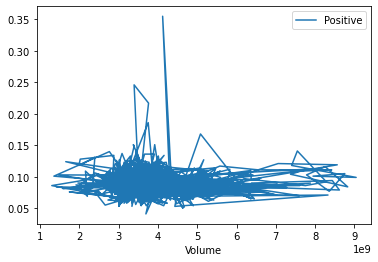

In [66]:
df3.plot('Volume', 'Positive')

In [67]:
y=df3['label']
x=df3[['Open', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]

### Spliting the data

In [68]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

### Fitting the data

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [71]:
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

### Accuracy

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       248

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



# Prediction of historical stock prices

In [76]:
# taking datasets of historical price
df3=df
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,1995.829956,4666470000
1,2015-10-08,1994.010010,2016.500000,1987.530029,2013.430054,2013.430054,3939140000
2,2015-10-09,2013.729980,2020.130005,2007.609985,2014.890015,2014.890015,3706900000
3,2015-10-12,2015.650024,2018.660034,2010.550049,2017.459961,2017.459961,2893250000
4,2015-10-13,2015.000000,2022.339966,2001.780029,2003.689941,2003.689941,3401920000
...,...,...,...,...,...,...,...
1234,2020-09-01,3507.439941,3528.030029,3494.600098,3526.649902,3526.649902,4083110000
1235,2020-09-02,3543.760010,3588.110107,3535.229980,3580.840088,3580.840088,4285190000
1236,2020-09-03,3564.739990,3564.850098,3427.409912,3455.060059,3455.060059,4898680000
1237,2020-09-04,3453.600098,3479.149902,3349.629883,3426.959961,3426.959961,4431440000


In [80]:
df3['Date']=pd.to_datetime(df3['Date'])

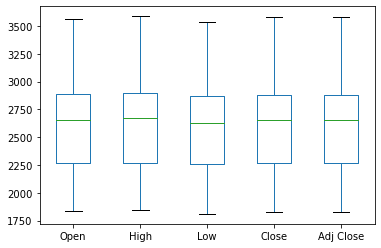

In [81]:
df3[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [82]:
x1=df3[['Open', 'High', 'Low', 'Volume']]
y1=df3[['Close']]

In [83]:
x1.head()

,Open,High,Low,Volume
0,1982.339966,1999.310059,1976.439941,4666470000
1,1994.010010,2016.500000,1987.530029,3939140000
2,2013.729980,2020.130005,2007.609985,3706900000
3,2015.650024,2018.660034,2010.550049,2893250000
4,2015.000000,2022.339966,2001.780029,3401920000


In [84]:
y1.head()

,Close
0,1995.829956
1,2013.430054
2,2014.890015
3,2017.459961
4,2003.689941


In [85]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2, random_state=0)

In [86]:
x1_train.shape

(991, 4)

In [87]:
x1_test.shape

(248, 4)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
model1=LinearRegression()

In [91]:
model1.fit(x1_train, y1_train)

LinearRegression()

In [93]:
print(model1.coef_)

[[-7.39965162e-01  9.71466765e-01  7.67745156e-01 -2.90003799e-10]]


In [94]:
print(model1.intercept_)

[2.24189566]


In [96]:
predicted=pd.DataFrame(model1.predict(x1_test), columns=['predicted price'])
predicted.head()

,predicted price
0,2273.500637
1,2070.841528
2,2856.347828
3,2875.650658
4,2399.574026


In [98]:
y1_test.head()

,Close
308,2268.879883
152,2066.659912
722,2857.050049
877,2873.399902
351,2395.959961


In [100]:
model1.score(x1_test, y1_test)

0.9992998009642504

In [101]:
predicted.shape

(248, 1)

#### model evaluation

In [103]:
import math
from sklearn import metrics
print("Mean absolute error : ",metrics.mean_absolute_error(y1_test,predicted))
print("Mean squared error : ",metrics.mean_squared_error(y1_test,predicted))
print("Root Mean squared error : ",math.sqrt(metrics.mean_squared_error(y1_test,predicted)))

Mean absolute error :  6.092009009292542
Mean squared error :  95.65916247076743
Root Mean squared error :  9.78055021308962
